## EECS 738: Lab 5

### Step 0: Import relevant packages

In [2]:
from __future__ import print_function

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar100, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")
print('The Tensorflow version is {}.'.format(tf.__version__))
print('The Keras version is {}.'.format(keras.__version__))
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print(np.__file__)

Packages Loaded
The Tensorflow version is 2.1.0.
The Keras version is 2.2.4-tf.
The Pandas version is 1.0.3.
The Numpy version is 1.18.1.
C:\ProgramData\Anaconda2\envs\TFK35\lib\site-packages\numpy\__init__.py


Using TensorFlow backend.


### Step 1: Import Cifar 10, 100 datasets
### Step 2: Prepare the data - Typecasting, Normalization

In [3]:
# Now import Cifar-10 data and process it.
(x1_train, y1_train), (x1_test, y1_test) = cifar10.load_data()

x1_train = x1_train.astype('float32')
x1_test = x1_test.astype('float32')
x1_train /= 255
x1_test /= 255

x1_train = tf.keras.utils.normalize(x1_train, axis=1)
x1_test = tf.keras.utils.normalize(x1_test, axis=1)

y1_train = tf.keras.utils.to_categorical(y1_train, 10)
y1_test = tf.keras.utils.to_categorical(y1_test, 10)

print('Shape of Cifar10 train data {}.'.format(x1_train.shape))
print('Shape of Cifar10 test data {}.'.format(x1_test.shape))

Shape of Cifar10 train data (50000, 32, 32, 3).
Shape of Cifar10 test data (10000, 32, 32, 3).


### Step 3: Prepare Cifar 100 

In [4]:
# Now import Cifar-100 data and process it.
(x2_train, y2_train), (x2_test, y2_test) = cifar100.load_data()

x2_train = x2_train.astype('float32')
x2_test = x2_test.astype('float32')
x2_train /= 255
x2_test /= 255

x2_train = tf.keras.utils.normalize(x2_train, axis=1)
x2_test = tf.keras.utils.normalize(x2_test, axis=1)

y2_train = tf.keras.utils.to_categorical(y2_train, 100)
y2_test = tf.keras.utils.to_categorical(y2_test, 100)

print('Shape of Cifar100 train data {}.'.format(x2_train.shape))
print('Shape of Cifar100 test data {}.'.format(x2_test.shape))

Shape of Cifar100 train data (50000, 32, 32, 3).
Shape of Cifar100 test data (10000, 32, 32, 3).


### Step 4: Sequential for Cifar10, 100

#### Sequential Cifar10 - 64,64,64,10

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 35us/sample - loss: 2.0858 - accuracy: 0.2343 - val_loss: 2.0065 - val_accuracy: 0.2746
Epoch 2/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8974 - accuracy: 0.3142 - val_loss: 1.8912 - val_accuracy: 0.3201
Epoch 3/20
50000/50000 [==============================] - 2s 31us/sample - loss: 1.8089 - accuracy: 0.3492 - val_loss: 1.7792 - val_accuracy: 0.3631
Epoch 4/20
50000/50000 [==============================] - 2s 30us/sample - loss: 1.7478 - accuracy: 0.3757 - val_loss: 1.8976 - val_accuracy: 0.3438
Epoch 5/20
50000/50000 [==============================] - 1s 27us/sample - loss: 1.7045 - accuracy: 0.3897 - val_loss: 1.8039 - val_accuracy: 0.3631
Epoch 6/20
50000/50000 [==============================] - 1s 26us/sample - loss: 1.6684 - accuracy: 0.4046 - val_loss: 1.7216 - val_accuracy: 0.3863
Epoch 7/20
50000/50000 [==============================] 

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Sequential Cifar10 Neural Nets')

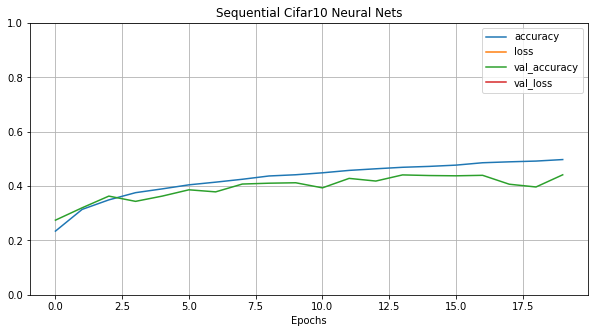

10000/10000 [==============================] - 0s 23us/sample - loss: 1.5828 - accuracy: 0.4415


[1.5827758449554443, 0.4415]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Our baseline model for this lab.
model = Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(3072,)))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

# Notice that you can reshape the data for an MLP inside the fit call without changing it globally!
model_detail = model.fit(x1_train.reshape(50000, 3072), y1_train, epochs=20, batch_size=64, validation_data=(x1_test.reshape(10000, 3072), y1_test))

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Sequential Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x1_test.reshape(10000, 3072),y1_test)

#Print the summary of the model
model.summary()

#### Sequential Cifar100 - 64,64,64,10

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 35us/sample - loss: 4.5495 - accuracy: 0.0161 - val_loss: 4.4579 - val_accuracy: 0.0239
Epoch 2/20
50000/50000 [==============================] - 2s 31us/sample - loss: 4.3620 - accuracy: 0.0407 - val_loss: 4.2908 - val_accuracy: 0.0537
Epoch 3/20
50000/50000 [==============================] - 2s 31us/sample - loss: 4.1682 - accuracy: 0.0645 - val_loss: 4.1197 - val_accuracy: 0.0720
Epoch 4/20
50000/50000 [==============================] - 2s 32us/sample - loss: 4.0311 - accuracy: 0.0843 - val_loss: 4.0240 - val_accuracy: 0.0872
Epoch 5/20
50000/50000 [==============================] - 1s 30us/sample - loss: 3.9391 - accuracy: 0.0996 - val_loss: 3.9667 - val_accuracy: 0.0956
Epoch 6/20
50000/50000 [==============================] - 2s 33us/sample - loss: 3.8664 - accuracy: 0.1111 - val_loss: 3.9463 - val_accuracy: 0.1045
Epoch 7/20
50000/50000 [==============================] 

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'Sequential Cifar100 Neural Nets')

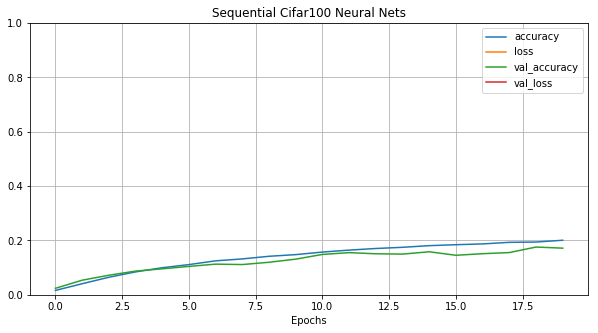

10000/10000 [==============================] - 0s 28us/sample - loss: 3.6395 - accuracy: 0.1716


[3.639465098953247, 0.1716]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               6500      
Total params: 215,652
Trainable params: 215,652
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Do the same for CIFAR-100.
# Our baseline model for this lab.
model = Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(3072,)))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

# Notice that you can reshape the data for an MLP inside the fit call without changing it globally!
model_detail = model.fit(x2_train.reshape(50000, 3072), y2_train, epochs=20, batch_size=64, validation_data=(x2_test.reshape(10000, 3072), y2_test))

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('Sequential Cifar100 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x2_test.reshape(10000, 3072),y2_test)

#Print the summary of the model
model.summary()

#### Analysis:
- MLP on Cifar 10 has Training accuracy = 0.5 and Validation accuracy = 0.44
- MLP on Cifar 100 has Trn acc = 0.2 and Val acc = 0.17
- Overfitting - We can see not much difference between Training and validation accuracies. So not much overfitting
- As MLP did not perform well on our image datasets. Performances are not good.

### Step 5: CNN for Cifar10, 100

#### CNN - baseline Cifar10

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 2.0146 - accuracy: 0.2622 - val_loss: 1.7597 - val_accuracy: 0.3609
Epoch 2/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.6485 - accuracy: 0.4052 - val_loss: 1.4445 - val_accuracy: 0.4840
Epoch 3/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.4314 - accuracy: 0.4862 - val_loss: 1.2834 - val_accuracy: 0.5449
Epoch 4/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.2940 - accuracy: 0.5395 - val_loss: 1.1929 - val_accuracy: 0.5871
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.1930 - accuracy: 0.5777 - val_loss: 1.0400 - val_accuracy: 0.6343
Epoch 6/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.1252 - accuracy: 0.6023 - val_loss: 1.0315 - val_accuracy: 0.6446
Epoch 7/10
50000/50000 [==============================] 

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Neural Nets')

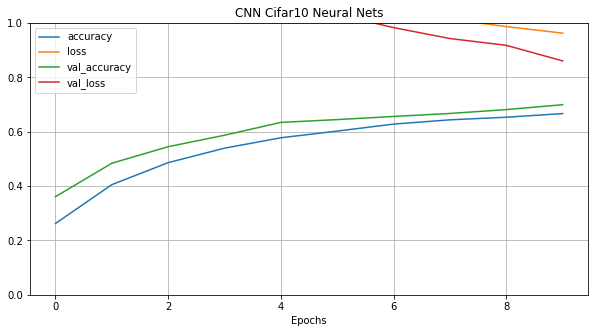

10000/10000 [==============================] - 2s 214us/sample - loss: 0.8605 - accuracy: 0.6994


[0.860467667388916, 0.6994]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_30 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 32)        0    

In [11]:
# Create the CIFAR-10 CNN baseline here.
inputs = tf.keras.Input(shape=x1_train.shape[1:], name='img')
x= keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Conv2D(32, (3, 3))(x)
x= keras.layers.Activation('relu')(x)
x= keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x= keras.layers.Dropout(0.25)(x)

y= keras.layers.Conv2D(32, (3, 3), padding='same')(x)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Conv2D(32, (3, 3))(y)
y= keras.layers.Activation('relu')(y)
y= keras.layers.MaxPooling2D(pool_size=(2, 2))(y)
y= keras.layers.Dropout(0.25)(y)

z= keras.layers.Flatten()(y)
z= keras.layers.Dense(512)(z)
z=keras.layers.Activation('relu')(z)
z=keras.layers.Dropout(0.5)(z)
z=keras.layers.Dense(10)(z)
outputs= keras.layers.Activation('softmax')(z)

model = tf.keras.Model(inputs, outputs, name='resnet')

# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x1_train, y1_train,
              batch_size=32,
              epochs=10,
              validation_data=(x1_test, y1_test),
              callbacks=[early_stopping_cb],
              shuffle=True)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x1_test,y1_test)

#Print the summary of the model
model.summary()

#### CNN - baseline Cifar100

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 4.6070 - accuracy: 0.0088 - val_loss: 4.6053 - val_accuracy: 0.0100
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 4.6065 - accuracy: 0.0089 - val_loss: 4.6054 - val_accuracy: 0.0100
Epoch 3/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 4.6066 - accuracy: 0.0094 - val_loss: 4.6049 - val_accuracy: 0.0100
Epoch 4/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 4.5583 - accuracy: 0.0202 - val_loss: 4.4533 - val_accuracy: 0.0468
Epoch 5/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 4.2797 - accuracy: 0.0591 - val_loss: 3.9884 - val_accuracy: 0.1060
Epoch 6/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 3.9081 - accuracy: 0.1099 - val_loss: 3.5552 - val_accuracy: 0.1722
Epoch 7/10
50000/50000 [==============================] 

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Neural Nets')

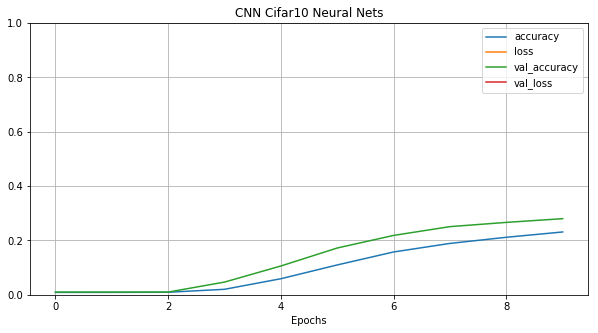

10000/10000 [==============================] - 2s 229us/sample - loss: 2.9630 - accuracy: 0.2801


[2.9629975311279297, 0.2801]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_36 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 32)        0    

In [12]:
# Create the CIFAR-100 CNN baseline here.
inputs = tf.keras.Input(shape=x2_train.shape[1:], name='img')
x= keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Conv2D(32, (3, 3))(x)
x= keras.layers.Activation('relu')(x)
x= keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x= keras.layers.Dropout(0.25)(x)

y= keras.layers.Conv2D(32, (3, 3), padding='same')(x)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Conv2D(32, (3, 3))(y)
y= keras.layers.Activation('relu')(y)
y= keras.layers.MaxPooling2D(pool_size=(2, 2))(y)
y= keras.layers.Dropout(0.25)(y)

z= keras.layers.Flatten()(y)
z= keras.layers.Dense(512)(z)
z=keras.layers.Activation('relu')(z)
z=keras.layers.Dropout(0.5)(z)
z=keras.layers.Dense(100)(z)
outputs= keras.layers.Activation('softmax')(z)

model = tf.keras.Model(inputs, outputs, name='resnet')
# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x2_train, y2_train,
              batch_size=32,
              epochs=10,
              validation_data=(x2_test, y2_test),
              callbacks=[early_stopping_cb],
              shuffle=True)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x2_test,y2_test)

#Print the summary of the model
model.summary()

#### Analysis:
- Baseline CNN for Cifar10 has Trn acc = 0.67 and Val acc = 0.7
- Baseline CNN for Cifar 100 has Trn acc = 0.23 and Val acc = 0.28
- Overfitting - We can see not much difference between Training and validation accuracies. I think not much overfitting.
- Performance - We have better performance on Cifar 10 but poor performance on Cifar100
- Convolution neural networks use a convolution filter which gathers domain knowledge in images (like features) better than plain multi level perceptrons. So is the better performance than MLP.
- Cifar 10 has less number classes to classify compared to Cifar 100 (10 times more). We have almost same number of training and validation examples. This is the reason behind better performance for Cifar10 for same epochs and hyerparameter combinations.

### Step 6: CNN 64 filters Cifar10

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 122s 2ms/sample - loss: 2.0057 - accuracy: 0.2626 - val_loss: 1.6309 - val_accuracy: 0.4125
Epoch 2/10
50000/50000 [==============================] - 129s 3ms/sample - loss: 1.5458 - accuracy: 0.4447 - val_loss: 1.3326 - val_accuracy: 0.5279
Epoch 3/10
50000/50000 [==============================] - 129s 3ms/sample - loss: 1.3034 - accuracy: 0.5378 - val_loss: 1.1411 - val_accuracy: 0.5956
Epoch 4/10
50000/50000 [==============================] - 127s 3ms/sample - loss: 1.1408 - accuracy: 0.5977 - val_loss: 1.0016 - val_accuracy: 0.6539
Epoch 5/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 1.0349 - accuracy: 0.6356 - val_loss: 0.9184 - val_accuracy: 0.6823
Epoch 6/10
50000/50000 [==============================] - 125s 2ms/sample - loss: 0.9575 - accuracy: 0.6629 - val_loss: 0.8715 - val_accuracy: 0.7035
Epoch 7/10
50000/50000 [==========================

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Neural Nets')

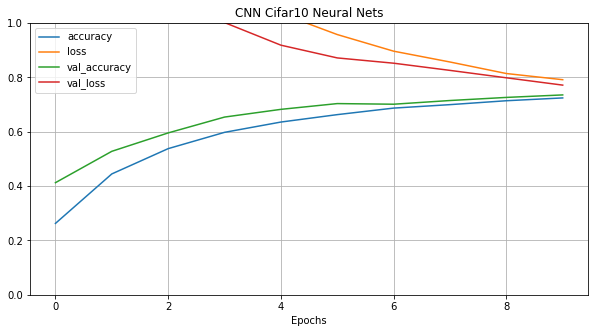

10000/10000 [==============================] - 5s 519us/sample - loss: 0.7714 - accuracy: 0.7354


[0.7714399428367614, 0.7354]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_66 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 15, 15, 64)        0    

In [17]:
# Change the Convolutional layers to 64 filters for CIFAR-10.
inputs = tf.keras.Input(shape=x1_train.shape[1:], name='img')
x= keras.layers.Conv2D(64, (3, 3), padding='same')(inputs)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Conv2D(64, (3, 3))(x)
x= keras.layers.Activation('relu')(x)
x= keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x= keras.layers.Dropout(0.25)(x)

y= keras.layers.Conv2D(64, (3, 3), padding='same')(x)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Conv2D(64, (3, 3))(y)
y= keras.layers.Activation('relu')(y)
y= keras.layers.MaxPooling2D(pool_size=(2, 2))(y)
y= keras.layers.Dropout(0.25)(y)

z= keras.layers.Flatten()(y)
z= keras.layers.Dense(512)(z)
z=keras.layers.Activation('relu')(z)
z=keras.layers.Dropout(0.5)(z)
z=keras.layers.Dense(10)(z)
outputs= keras.layers.Activation('softmax')(z)

model = tf.keras.Model(inputs, outputs, name='resnet')

# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x1_train, y1_train,
              batch_size=32,
              epochs=10,
              validation_data=(x1_test, y1_test),
              callbacks=[early_stopping_cb],
              shuffle=True)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x1_test,y1_test)

#Print the summary of the model
model.summary()

#### Analysis:
- CNN with 32 filters - Trn acc:0.67 and Val acc:0.7
- CNN with 64 filters - Trn acc:0.72 and Val acc:0.73
- Overfitting - We can see not much difference between training and validation accuracies. So not much overfitting.
- Performance - We can see by increasing the filter, we have slight increase in both training and validation accuracies.But not significant.

### Step 7: CNN 16 filters Cifar10

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 35s 691us/sample - loss: 2.0722 - accuracy: 0.2352 - val_loss: 1.7970 - val_accuracy: 0.3509
Epoch 2/10
50000/50000 [==============================] - 35s 707us/sample - loss: 1.7590 - accuracy: 0.3692 - val_loss: 1.6921 - val_accuracy: 0.3867
Epoch 3/10
50000/50000 [==============================] - 34s 670us/sample - loss: 1.5796 - accuracy: 0.4309 - val_loss: 1.4772 - val_accuracy: 0.4665
Epoch 4/10
50000/50000 [==============================] - 34s 677us/sample - loss: 1.4592 - accuracy: 0.4759 - val_loss: 1.3062 - val_accuracy: 0.5305
Epoch 5/10
50000/50000 [==============================] - 35s 700us/sample - loss: 1.3749 - accuracy: 0.5093 - val_loss: 1.3119 - val_accuracy: 0.5244
Epoch 6/10
50000/50000 [==============================] - 35s 700us/sample - loss: 1.3065 - accuracy: 0.5359 - val_loss: 1.1807 - val_accuracy: 0.5806
Epoch 7/10
50000/50000 [====================

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Neural Nets')

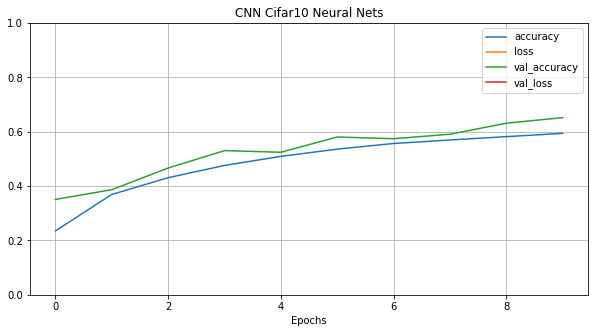

10000/10000 [==============================] - 2s 155us/sample - loss: 1.0213 - accuracy: 0.6518 - loss: 1.0210 - accuracy: 0.


[1.0213370000839233, 0.6518]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 30, 30, 16)        2320      
_________________________________________________________________
activation_72 (Activation)   (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 15, 15, 16)        0    

In [18]:
# Change the Convolutional layers to 16 filters for CIFAR-10.
inputs = tf.keras.Input(shape=x1_train.shape[1:], name='img')
x= keras.layers.Conv2D(16, (3, 3), padding='same')(inputs)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Conv2D(16, (3, 3))(x)
x= keras.layers.Activation('relu')(x)
x= keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x= keras.layers.Dropout(0.25)(x)

y= keras.layers.Conv2D(16, (3, 3), padding='same')(x)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Conv2D(16, (3, 3))(y)
y= keras.layers.Activation('relu')(y)
y= keras.layers.MaxPooling2D(pool_size=(2, 2))(y)
y= keras.layers.Dropout(0.25)(y)

z= keras.layers.Flatten()(y)
z= keras.layers.Dense(512)(z)
z=keras.layers.Activation('relu')(z)
z=keras.layers.Dropout(0.5)(z)
z=keras.layers.Dense(10)(z)
outputs= keras.layers.Activation('softmax')(z)

model = tf.keras.Model(inputs, outputs, name='resnet')

# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x1_train, y1_train,
              batch_size=32,
              epochs=10,
              validation_data=(x1_test, y1_test),
              callbacks=[early_stopping_cb],
              shuffle=True)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x1_test,y1_test)

#Print the summary of the model
model.summary()

#### Analysis:
- CNN with 32 filters - Trn acc:0.67 and Val acc:0.7
- CNN with 16 filters - Trn acc:0.59 and Val acc:0.65
- Overfitting - We can see not much difference between training and validation accuracies. So not much overfitting.
- Performance - We can see by decreasing the filters, we have slight decrease in both training and validation accuracies.But not significant.

### Step 8: CNN with no pooling

#### Cifar10 - No pooling

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 153s 3ms/sample - loss: 1.9108 - accuracy: 0.3058 - val_loss: 1.6694 - val_accuracy: 0.3995
Epoch 2/10
50000/50000 [==============================] - 153s 3ms/sample - loss: 1.4837 - accuracy: 0.4701 - val_loss: 1.3570 - val_accuracy: 0.5194
Epoch 3/10
50000/50000 [==============================] - 152s 3ms/sample - loss: 1.2120 - accuracy: 0.5727 - val_loss: 1.1691 - val_accuracy: 0.5804
Epoch 4/10
50000/50000 [==============================] - 154s 3ms/sample - loss: 1.0364 - accuracy: 0.6343 - val_loss: 1.0665 - val_accuracy: 0.6192
Epoch 5/10
50000/50000 [==============================] - 153s 3ms/sample - loss: 0.8840 - accuracy: 0.6877 - val_loss: 1.0395 - val_accuracy: 0.6392
Epoch 6/10
50000/50000 [==============================] - 203s 4ms/sample - loss: 0.7468 - accuracy: 0.7377 - val_loss: 1.0647 - val_accuracy: 0.6402
Epoch 7/10
50000/50000 [==========================

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Neural Nets')

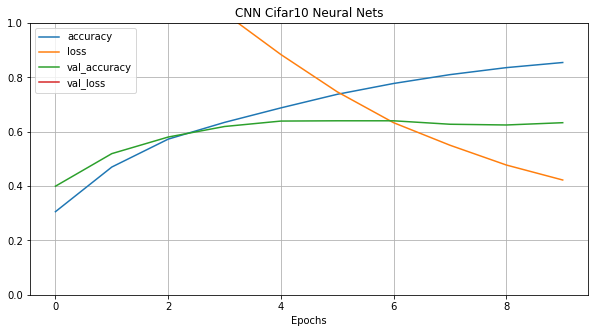

10000/10000 [==============================] - 5s 462us/sample - loss: 1.2164 - accuracy: 0.6332


[1.2164052847862243, 0.6332]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_77 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_78 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 30, 30, 32)        9248 

In [19]:
# Remove the Max Pooling Layers for CIFAR-10.
inputs = tf.keras.Input(shape=x1_train.shape[1:], name='img')
x= keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Conv2D(32, (3, 3))(x)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Dropout(0.25)(x)

y= keras.layers.Conv2D(32, (3, 3), padding='same')(x)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Conv2D(32, (3, 3))(y)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Dropout(0.25)(y)

z= keras.layers.Flatten()(y)
z= keras.layers.Dense(512)(z)
z=keras.layers.Activation('relu')(z)
z=keras.layers.Dropout(0.5)(z)
z=keras.layers.Dense(10)(z)
outputs= keras.layers.Activation('softmax')(z)

model = tf.keras.Model(inputs, outputs, name='resnet')

# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x1_train, y1_train,
              batch_size=32,
              epochs=10,
              validation_data=(x1_test, y1_test),
              callbacks=[early_stopping_cb],
              shuffle=True)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x1_test,y1_test)

#Print the summary of the model
model.summary()

#### Cifar100 - No pooling

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 161s 3ms/sample - loss: 4.5154 - accuracy: 0.0243 - val_loss: 4.2950 - val_accuracy: 0.0585
Epoch 2/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 4.0724 - accuracy: 0.0868 - val_loss: 3.7221 - val_accuracy: 0.1421
Epoch 3/10
50000/50000 [==============================] - 178s 4ms/sample - loss: 3.6468 - accuracy: 0.1530 - val_loss: 3.3695 - val_accuracy: 0.2093
Epoch 4/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 3.3151 - accuracy: 0.2103 - val_loss: 3.1598 - val_accuracy: 0.2439
Epoch 5/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 2.9996 - accuracy: 0.2674 - val_loss: 2.9843 - val_accuracy: 0.2776
Epoch 6/10
50000/50000 [==============================] - 178s 4ms/sample - loss: 2.6877 - accuracy: 0.3251 - val_loss: 2.9459 - val_accuracy: 0.2822
Epoch 7/10
50000/50000 [==========================

(0, 1)

Text(0.5, 0, 'Epochs')

Text(0.5, 1.0, 'CNN Cifar10 Neural Nets')

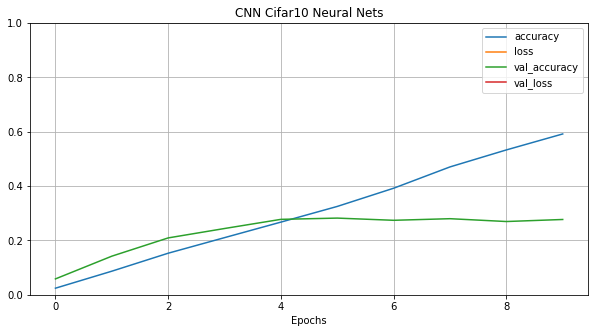

10000/10000 [==============================] - 5s 547us/sample - loss: 3.2093 - accuracy: 0.2771


[3.2092858432769775, 0.2771]

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_83 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_84 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 30, 30, 32)        9248 

In [20]:
# Remove the Max Pooling Layers for CIFAR-100.
inputs = tf.keras.Input(shape=x2_train.shape[1:], name='img')
x= keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Conv2D(32, (3, 3))(x)
x= keras.layers.Activation('relu')(x)
x= keras.layers.Dropout(0.25)(x)

y= keras.layers.Conv2D(32, (3, 3), padding='same')(x)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Conv2D(32, (3, 3))(y)
y= keras.layers.Activation('relu')(y)
y= keras.layers.Dropout(0.25)(y)

z= keras.layers.Flatten()(y)
z= keras.layers.Dense(512)(z)
z=keras.layers.Activation('relu')(z)
z=keras.layers.Dropout(0.5)(z)
z=keras.layers.Dense(100)(z)
outputs= keras.layers.Activation('softmax')(z)

model = tf.keras.Model(inputs, outputs, name='resnet')
# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x2_train, y2_train,
              batch_size=32,
              epochs=10,
              validation_data=(x2_test, y2_test),
              callbacks=[early_stopping_cb],
              shuffle=True)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Neural Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x2_test,y2_test)

#Print the summary of the model
model.summary()

#### Analysis:
- CNN with 32 filters on Cifar10 - Trn acc:0.67 and Val acc:0.7
- CNN with 32 filters on Cifr100 - Trn acc:0.23 and Val acc:0.28
- CNN with 32 filters on Cifar10 No pooling - Trn acc:0.8 and Val acc:0.65
- CNN with 32 filters on Cifr100 No pooling - Trn acc:0.6 and Val acc:0.3
- Overfitting - We can see not much difference between training and validation accuracies for Cifar10. So not much overfitting. But for Cifar100, we can see overfitting. Training accuracy is good but validation accuracy remained same.
- Performance - Pooling is a technique that uses a reduced filter size and reduces the number of parameters. Advantage of pooling would be improved training times and less number of parameters.
- If pooling is removed, convolution filter uses its regular size and model trains more parameters.
- On Cifar10, there is not much improvement or bad performance.
- On Cifar100, we can see overfitting on Training data but validation accuracy is not improved.
- So removing pooling did not contributed much on Cifar 10 and 100 datasets.

### Step 9: CNN with Data augmentation on Cifar10

In [3]:
# Data Augmentation.
batch_size = 64
num_classes = 10
epochs = 40
data_augmentation = True

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x1_train, y1_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x1_test, y1_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0., 
        horizontal_flip=True,
        vertical_flip=False, 
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    datagen.fit(x_train)

    model.fit(datagen.flow(x1_train, y1_train,
                        batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x1_test, y1_test))

scores = model.evaluate(x1_test, y1_test, verbose=0)

Using real-time data augmentation.
  ...
    to  
  ['...']
Train for 782 steps, validate on 10000 samples
Epoch 1/40
782/782 [==============================] - 97s 124ms/step - loss: 1.8367 - accuracy: 0.3264 - val_loss: 1.3982 - val_accuracy: 0.4920
Epoch 2/40
782/782 [==============================] - 94s 120ms/step - loss: 1.4202 - accuracy: 0.4860 - val_loss: 1.1817 - val_accuracy: 0.5753
Epoch 3/40
782/782 [==============================] - 94s 120ms/step - loss: 1.2574 - accuracy: 0.5479 - val_loss: 1.0560 - val_accuracy: 0.6257
Epoch 4/40
782/782 [==============================] - 94s 120ms/step - loss: 1.1465 - accuracy: 0.5897 - val_loss: 1.0090 - val_accuracy: 0.6400
Epoch 5/40
782/782 [==============================] - 101s 129ms/step - loss: 1.0788 - accuracy: 0.6171 - val_loss: 0.8934 - val_accuracy: 0.6844
Epoch 6/40
782/782 [==============================] - 96s 122ms/step - loss: 1.0210 - accuracy: 0.6411 - val_loss: 0.9206 - val_accuracy: 0.6845
Epoch 7/40
782/782 [==

### Step 10: CNN Rsnet on Cifar10

In [ ]:
# Here is our CIFAR-10 CNN ResNet.
inputs = tf.keras.Input(shape=(32, 32, 3), name='img')
x = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
x = keras.layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_3_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_4_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_5_output = tf.keras.layers.add([x, block_4_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_5_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_6_output = tf.keras.layers.add([x, block_5_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_6_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_7_output = tf.keras.layers.add([x, block_6_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_7_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_8_output = tf.keras.layers.add([x, block_7_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_8_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_9_output = tf.keras.layers.add([x, block_8_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_9_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_10_output = tf.keras.layers.add([x, block_9_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_10_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_11_output = tf.keras.layers.add([x, block_10_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_11_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_12_output = tf.keras.layers.add([x, block_11_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_12_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_13_output = tf.keras.layers.add([x, block_12_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_13_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_14_output = tf.keras.layers.add([x, block_13_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_14_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_15_output = tf.keras.layers.add([x, block_14_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_15_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_16_output = tf.keras.layers.add([x, block_15_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_16_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_17_output = tf.keras.layers.add([x, block_16_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_17_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_18_output = tf.keras.layers.add([x, block_17_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_18_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_19_output = tf.keras.layers.add([x, block_18_output])

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(block_19_output)
x = BatchNormalization()(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_20_output = tf.keras.layers.add([x, block_19_output])

x = keras.layers.Conv2D(64, 3, activation='relu')(block_20_output)
x = GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')


model.compile(Adam(amsgrad=True), 'binary_crossentropy', metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_detail = model.fit(x1_train, y1_train,
                  batch_size=256,
                  epochs=10,
                  callbacks=[early_stopping_cb],
                  shuffle=True,
                  validation_split=0.2)

#plot accuracies for each epoch
history = pd.DataFrame(model_detail.history)
 
history.plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.title('CNN Cifar10 Residual Nets')
plt.show()

#After training the model, evaluate the test set
model.evaluate(x1_test,y1_test)

#Print the summary of the model
model.summary()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 467s 12ms/sample - loss: 0.3064 - accuracy: 0.8996 - val_loss: 0.7459 - val_accuracy: 0.8203
Epoch 2/10
40000/40000 [==============================] - 497s 12ms/sample - loss: 0.2315 - accuracy: 0.9134 - val_loss: 0.4012 - val_accuracy: 0.8975
Epoch 3/10
40000/40000 [==============================] - 487s 12ms/sample - loss: 0.1878 - accuracy: 0.9284 - val_loss: 0.2295 - val_accuracy: 0.9122
Epoch 4/10
40000/40000 [==============================] - 489s 12ms/sample - loss: 0.1627 - accuracy: 0.9380 - val_loss: 0.1939 - val_accuracy: 0.9265
Epoch 5/10
40000/40000 [==============================] - 492s 12ms/sample - loss: 0.1453 - accuracy: 0.9445 - val_loss: 0.2068 - val_accuracy: 0.9234
Epoch 6/10
40000/40000 [==============================] - 486s 12ms/sample - loss: 0.1319 - accuracy: 0.9499 - val_loss: 0.2010 - val_accuracy: 0.9267
Epoch 7/10
19456/40000 [=============>......

In [ ]:
# Create the CIFAR-100 CNN ResNet.


In [ ]:
# Create your own CNN that rivals a CNN ResNet for CIFAR-100.
